# Pr√©diction de l'√©volution des pand√©mies COVID-19 (New Cases) au Canada

## Objectif
### D√©velopper un mod√®le de Machine Learning capable de **pr√©dire le nombre de nouveaux cas journaliers de COVID-19** dans un pays donn√©, √† partir de donn√©es historiques, en comparant plusieurs mod√®les.

### Dans un premier temps, nous allons utiliser les donn√©es du canada pour indentifier les tendances et les caract√©ristiques des donn√©es, puis nous allons d√©velopper un mod√®le de Machine Learning pour pr√©dire le nombre de nouveaux cas journaliers de COVID-19 dans le pays.


C:\Users\wamba\AppData\Local\Temp\ipykernel_22120\3329399190.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_deaths', y='country', data=df_deaths, palette='Reds_r')
C:\Users\wamba\AppData\Local\Temp\ipykernel_22120\3329399190.py:24: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\wamba\AppData\Local\Temp\ipykernel_22120\3329399190.py:31: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\wamba\AppData\Local\Temp\ipykernel_22120\3329399190.py:48: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\wamba\Desktop\python\solution-ia-mspr\myenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128308 (\N{LARG

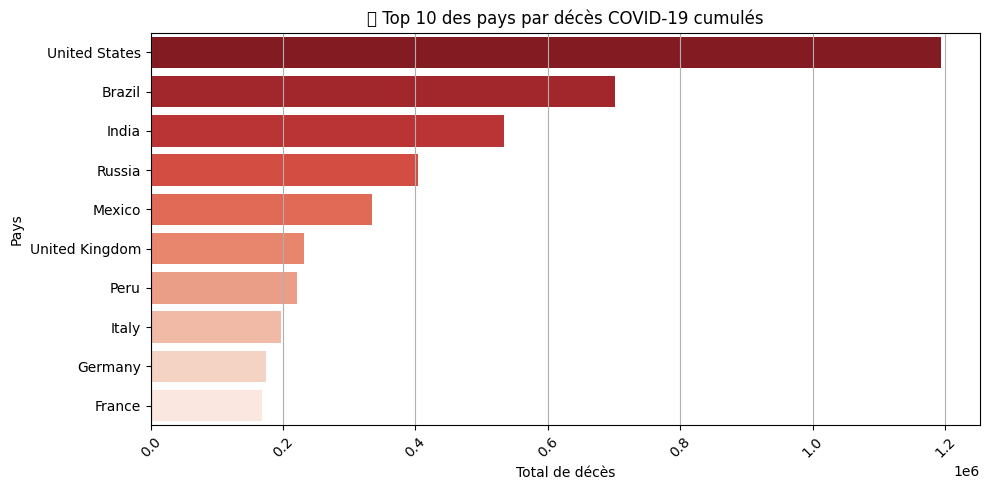

c:\Users\wamba\Desktop\python\solution-ia-mspr\myenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


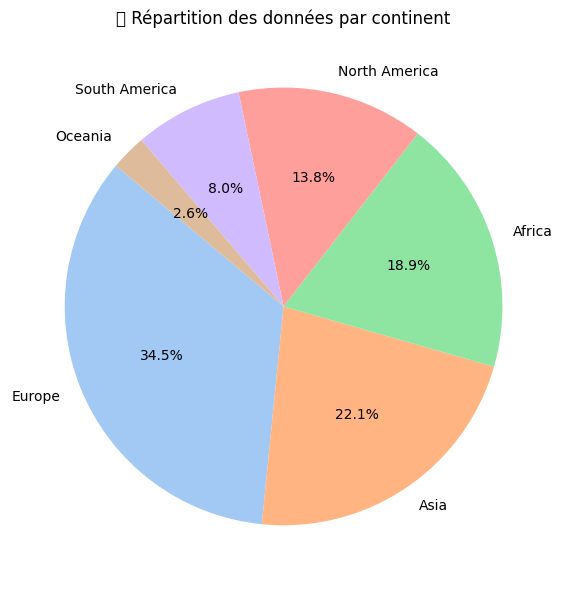

c:\Users\wamba\Desktop\python\solution-ia-mspr\myenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


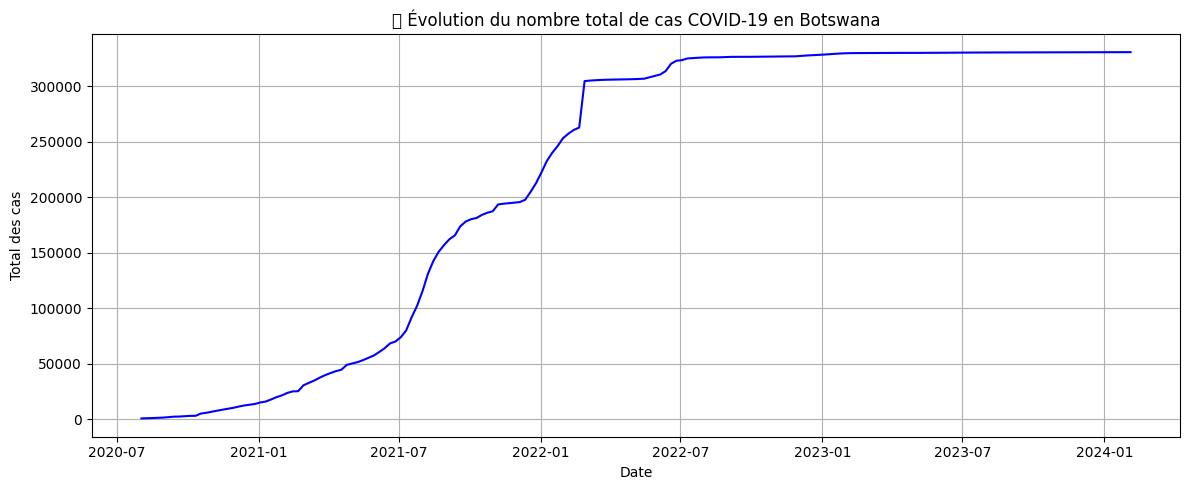

C:\Users\wamba\AppData\Local\Temp\ipykernel_22120\3329399190.py:58: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\wamba\Desktop\python\solution-ia-mspr\myenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


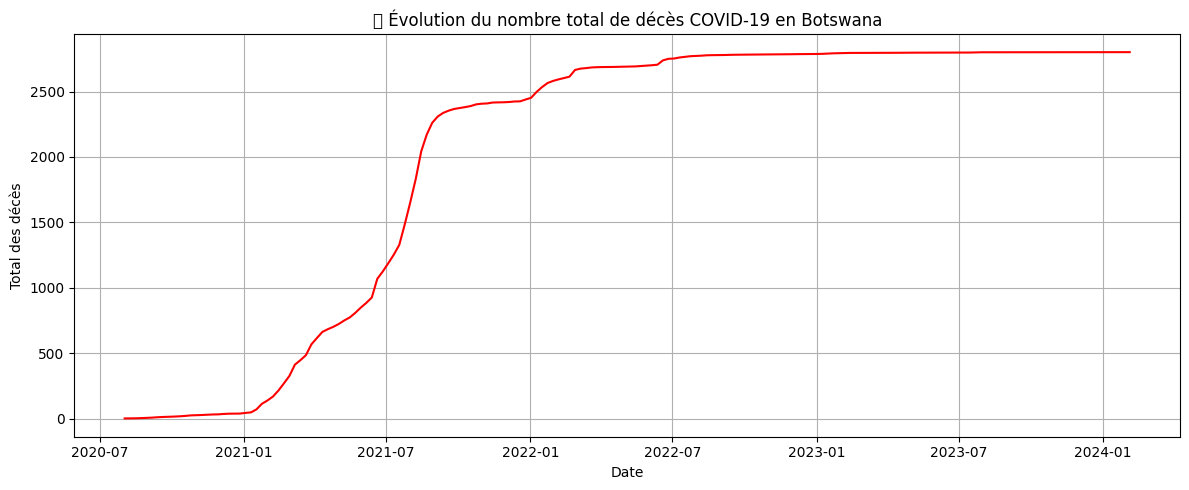

C:\Users\wamba\AppData\Local\Temp\ipykernel_22120\3329399190.py:68: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\wamba\Desktop\python\solution-ia-mspr\myenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


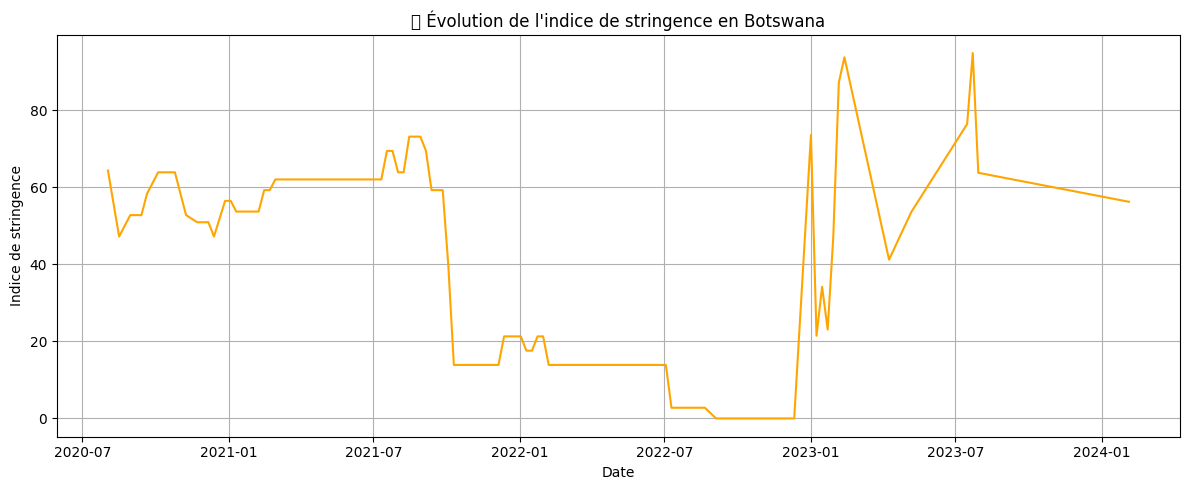

C:\Users\wamba\AppData\Local\Temp\ipykernel_22120\3329399190.py:79: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\wamba\Desktop\python\solution-ia-mspr\myenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


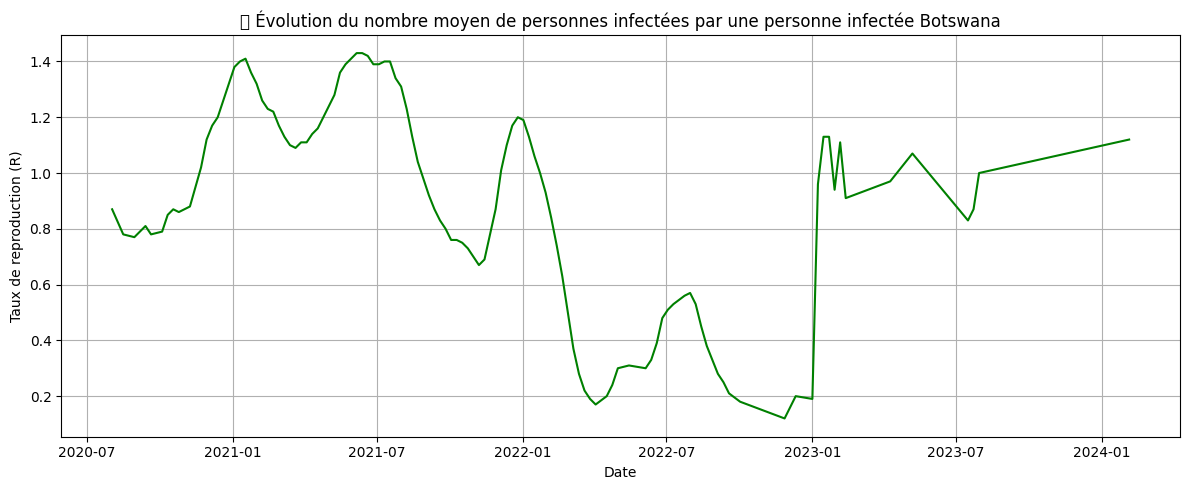

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Chargement des donn√©es
df_all = pd.read_csv("../dataset/clean_covid19_data_v2.csv")

# V√©rification des colonnes attendues
expected_columns = ['country', 'total_deaths', 'total_cases', 'continent', 'date', 'stringency_index', 'reproduction_rate']
missing_columns = [col for col in expected_columns if col not in df_all.columns]
if missing_columns:
    raise ValueError(f"Colonnes manquantes : {missing_columns}")

# 1. Top 10 des pays avec le plus de d√©c√®s
df_deaths = df_all.groupby('country')['total_deaths'].max().sort_values(ascending=False).head(10).reset_index()
fig1 = plt.figure(figsize=(10, 5))
sns.barplot(x='total_deaths', y='country', data=df_deaths, palette='Reds_r')
plt.title("üî¥ Top 10 des pays par d√©c√®s COVID-19 cumul√©s")
plt.xticks(rotation=45)
plt.xlabel("Total de d√©c√®s")
plt.ylabel("Pays")
plt.grid(True, axis='x')
plt.tight_layout()

# 2. R√©partition des continents dans les donn√©es (pie chart)
continent_counts = df_all['continent'].dropna().value_counts()
fig3 = plt.figure(figsize=(6, 6))
plt.pie(continent_counts, labels=continent_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("üåç R√©partition des donn√©es par continent")
plt.tight_layout()


# S√©lection al√©atoire d'un pays pour les graphiques suivants
country =  random.choice(df_all['country'].unique())

# Filtrage des donn√©es pour le pays s√©lectionn√©
df_country = df_all[df_all['country'] == country].copy()
df_country['date'] = pd.to_datetime(df_country['date'])

# === Graphique 1 : Total des cas ===
plt.figure(figsize=(12, 5))
sns.lineplot(x='date', y='total_cases', data=df_country, color='blue')
plt.title(f"üìà √âvolution du nombre total de cas COVID-19 en {country}")
plt.xlabel("Date")
plt.ylabel("Total des cas")
plt.grid(True)
plt.tight_layout()
plt.show()

# === Graphique 2 : Total des d√©c√®s ===
plt.figure(figsize=(12, 5))
sns.lineplot(x='date', y='total_deaths', data=df_country, color='red')
plt.title(f"üìâ √âvolution du nombre total de d√©c√®s COVID-19 en {country}")
plt.xlabel("Date")
plt.ylabel("Total des d√©c√®s")
plt.grid(True)
plt.tight_layout()
plt.show()

# === Graphique 3 : Indice de stringence ===
plt.figure(figsize=(12, 5))
sns.lineplot(x='date', y='stringency_index', data=df_country, color='orange')
plt.title(f"üìä √âvolution de l'indice de stringence en {country}")
plt.xlabel("Date")
plt.ylabel("Indice de stringence")
plt.grid(True)
plt.tight_layout()
plt.show()
# stringency_index est un indice qui mesure la s√©v√©rit√© des mesures de confinement et de distanciation sociale mises en place par les gouvernements pour lutter contre la pand√©mie. Il est calcul√© sur une √©chelle de 0 √† 100, o√π 100 repr√©sente les mesures les plus strictes.

# === Graphique 4 : Taux de reproduction ===
plt.figure(figsize=(12, 5))
sns.lineplot(x='date', y='reproduction_rate', data=df_country, color='green')
plt.title(f"üìâ √âvolution du nombre moyen de personnes infect√©es par une personne infect√©e {country}")
plt.xlabel("Date")
plt.ylabel("Taux de reproduction (R)")
plt.grid(True)
plt.tight_layout()
plt.show()
# reproduction_rate est un indicateur cl√© de la dynamique de la pand√©mie. Il repr√©sente le nombre moyen de personnes infect√©es par une personne infect√©e. Un taux sup√©rieur √† 1 indique que l'√©pid√©mie est en expansion, tandis qu'un taux inf√©rieur √† 1 indique qu'elle est en contraction.

A noter : Les graphiques sont g√©n√©r√©s pour un pays al√©atoire √† chaque ex√©cution du script.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

      iso_code continent      country       date  total_cases  new_cases  \
12879      AFG      Asia  Afghanistan 2020-03-29           91         67   
6424       AFG      Asia  Afghanistan 2020-04-05          274        183   
12880      AFG      Asia  Afghanistan 2020-04-12          521        247   
0          AFG      Asia  Afghanistan 2020-04-19          908        387   
6425       AFG      Asia  Afghanistan 2020-04-26         1330        422   

       total_deaths  new_deaths  total_tests  positive_rate  ...  \
12879             2           2       518446           0.21  ...   
6424              5           3      6814263           0.05  ...   
12880            15          10      1716584           0.18  ...   
0                30          15      8796131           0.19  ...   
6425             43          13      7514673           0.30  ...   

       hospital_beds_per_thousand  extreme_poverty  new_vaccinations_smoothed  \
12879                         0.5            0.334   

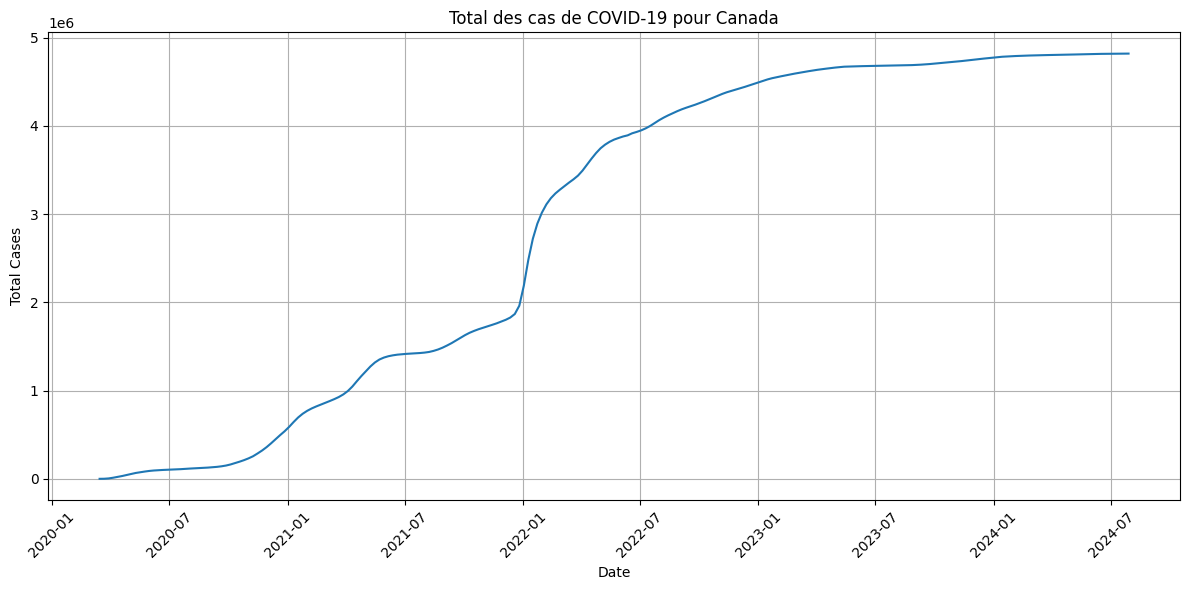

In [3]:
df = pd.read_csv("../dataset/clean_covid19_data_v2.csv", parse_dates=["date"]) # parse dates pour la colonne 'date' pour qu'elle soit au format datetime
df = df.sort_values(["country", "date"])

 # Afficher les premi√®res lignes du DataFrame
print(df.head())

# fonction pour tracer le nombre total de cas pour un pays sp√©cifique
def plot_country_cases(df, country):
    country_data = df[df["country"] == country]
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=country_data, x="date", y="total_cases")
    plt.title(f"Total des cas de COVID-19 pour {country}")
    plt.xlabel("Date")
    plt.ylabel("Total Cases")
    plt.xticks(rotation=45)
    plt.grid()
    plt.tight_layout()
    plt.show()
    
# Example usage pour le pays "Canada"
plot_country_cases(df, "Canada")

## Filtrage d'un pays pour tester le processus

In [4]:
df_fr = df[df["country"] == "Canada"].copy()
df_fr.reset_index(drop=True, inplace=True)

In [5]:
# Champs jug√©s utiles pour cette pr√©diction
features = [
    "total_cases", "population", "reproduction_rate", "stringency_index",
    "total_vaccinations", "people_vaccinated", "icu_patients", "hosp_patients"
]
target = "new_cases"

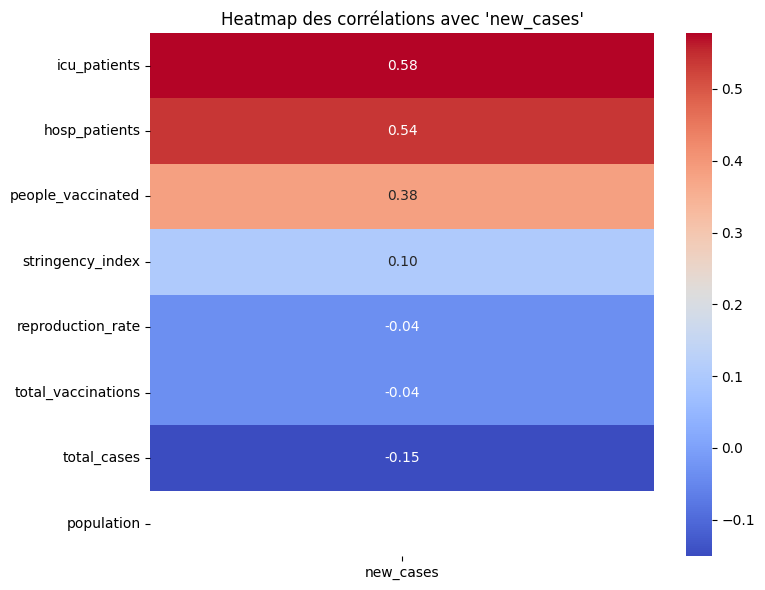

In [6]:
# visualisation de la corr√©lation entre les features s√©lectionn√©es

# On garde uniquement les lignes sans valeurs manquantes
df_corr = df_fr[features + [target]].dropna()

# Corr√©lation entre chaque feature et la cible
correlations = df_corr.corr()[[target]].drop(target).sort_values(by=target, ascending=False)

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap des corr√©lations avec 'new_cases'")
plt.tight_layout()
plt.show()

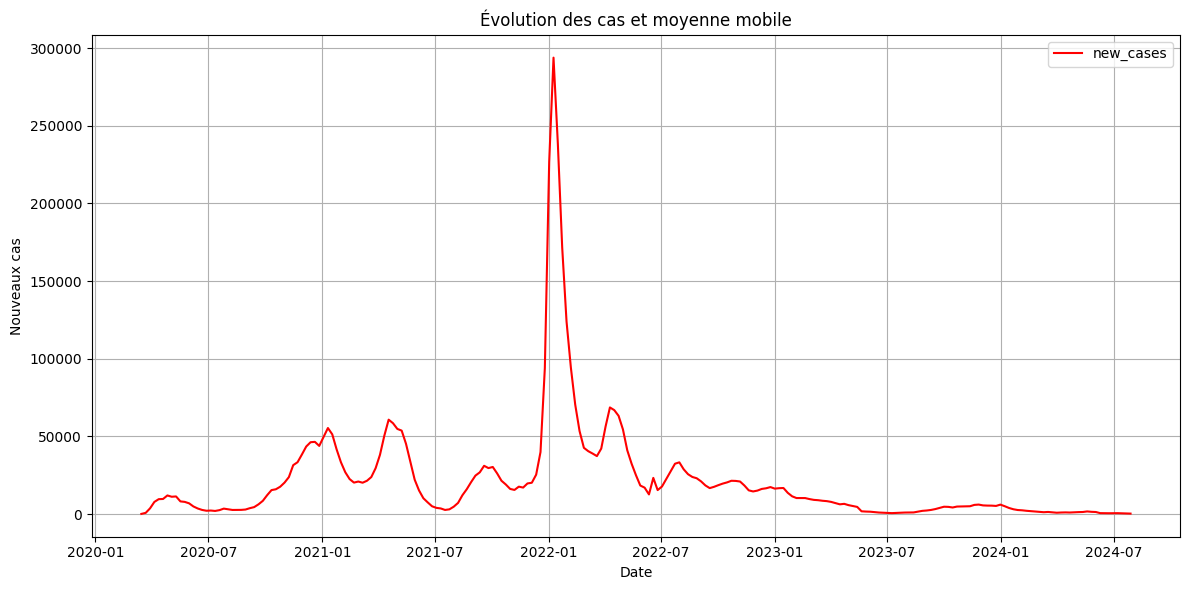

In [7]:
# Nettoyage au cas o√π certaines colonnes contiennent des NaN
df_model = df_fr[["date", "country"] + features + [target]].dropna() # bien qu'elle soit d√©j√† nettoy√©e, on s'assure qu'il n'y a pas de NaN dans les colonnes utilis√©es pour le mod√®le

plt.figure(figsize=(12,6))
plt.plot(df_model["date"], df_model["new_cases"], label="new_cases" , color='red')
plt.title("√âvolution des cas et moyenne mobile")
plt.xlabel("Date")
plt.ylabel("Nouveaux cas")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

##  Entra√Ænement des mod√®les

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%pip install joblib
import joblib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Export des donn√©es pr√©par√©es

In [9]:
df_model.to_csv("../dataset/test_data_canada.csv", index=False)
print(" Donn√©es pr√©par√©es et export√©es pour l'entra√Ænement : test_data_canada.csv")

 Donn√©es pr√©par√©es et export√©es pour l'entra√Ænement : test_data_canada.csv


## Chargement des donn√©es pr√©par√©es

In [10]:
df = pd.read_csv("../dataset/test_data_canada.csv", parse_dates=["date"])

# S√©paration des variables utile pour l'entra√Ænement
features = [
    "total_cases", "population", "reproduction_rate", "stringency_index",
    "total_vaccinations", "people_vaccinated", "icu_patients", "hosp_patients"
]
target = "new_cases"

X = df[features]
y = df[target]

## Split des donn√©es en train et test

In [11]:
split_idx = int(len(df) * 0.8)  # cette ligne divise les donn√©es en 80% pour l'entra√Ænement et 20% pour le test
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

## Mod√®le Random Forest

MAE : 2398.50
RMSE : 3180.77
R¬≤ : -1.68


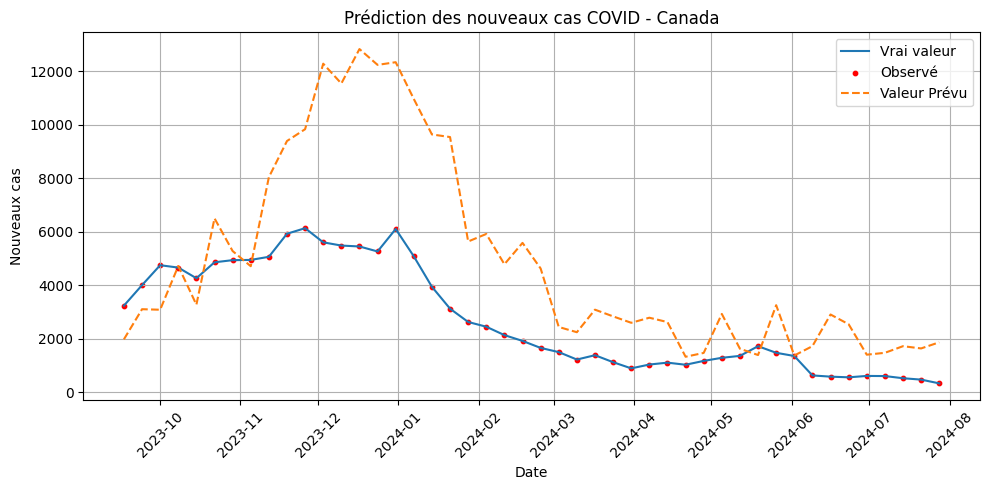

In [12]:
# Entra√Ænement du mod√®le Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Pr√©dictions
y_pred = model.predict(X_test)

# √âvaluation du mod√®le
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R¬≤ : {r2:.2f}")

#Comparaison des pr√©dictions et des valeurs r√©elles
plt.figure(figsize=(10, 5))
plt.plot(df["date"].iloc[split_idx:], y_test, label="Vrai valeur")
plt.scatter(df["date"].iloc[split_idx:], y_test, color='red', label="Observ√©", s=10)
plt.plot(df["date"].iloc[split_idx:], y_pred, label="Valeur Pr√©vu", linestyle="--")
plt.title("Pr√©diction des nouveaux cas COVID - Canada")
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Nouveaux cas")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

## Mod√®le XGBoost

MAE : 2446.40
RMSE : 3038.09
R¬≤ : -1.45


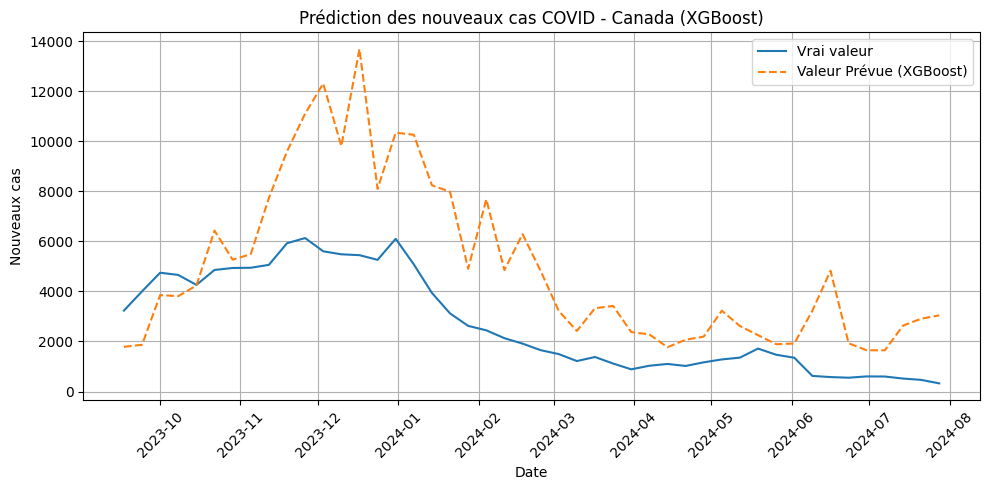

In [13]:
# Entra√Ænement XGBoost
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Pr√©diction
y_pred = model.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred))
r2_xgb = r2_score(y_test, y_pred)

print(f"MAE : {mae_xgb:.2f}")
print(f"RMSE : {rmse_xgb:.2f}")
print(f"R¬≤ : {r2_xgb:.2f}")

# Affichage graphique
plt.figure(figsize=(10, 5))
plt.plot(df["date"].iloc[split_idx:], y_test, label="Vrai valeur")
plt.plot(df["date"].iloc[split_idx:], y_pred, label="Valeur Pr√©vue (XGBoost)", linestyle="--")
plt.title("Pr√©diction des nouveaux cas COVID - Canada (XGBoost)")
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Nouveaux cas")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

## Mod√®le K-Nearest Neighbors Regressor


 K-Nearest Neighbors - R√©sultats
MAE  : 4217.80
RMSE : 7375.20
R¬≤   : -13.42


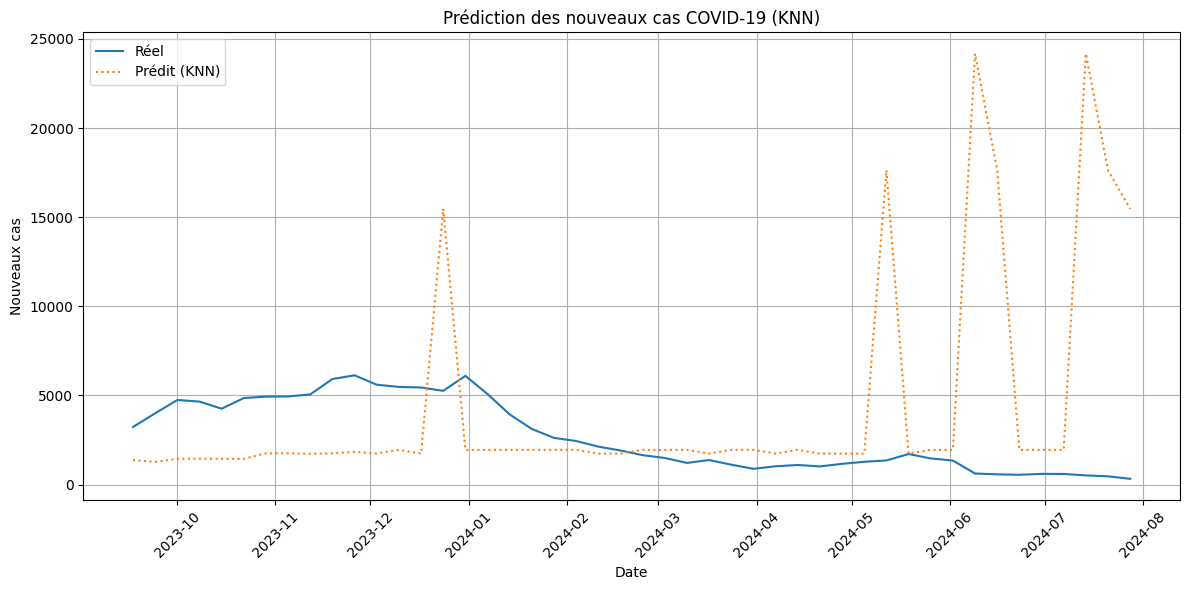

In [14]:
# Entra√Ænement du mod√®le
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Pr√©dictions
y_pred_knn = knn.predict(X_test)

# √âvaluation
mae_knn = mean_absolute_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
r2_knn = r2_score(y_test, y_pred_knn)

print("\n K-Nearest Neighbors - R√©sultats")
print(f"MAE  : {mae_knn:.2f}")
print(f"RMSE : {rmse_knn:.2f}")
print(f"R¬≤   : {r2_knn:.2f}")

# Visualisation des r√©sultats
plt.figure(figsize=(12, 6))
plt.plot(df["date"].iloc[split_idx:], y_test.values, label="R√©el")
plt.plot(df["date"].iloc[split_idx:], y_pred_knn, label="Pr√©dit (KNN)", linestyle=":")
plt.title("Pr√©diction des nouveaux cas COVID-19 (KNN)")
plt.xlabel("Date")
plt.ylabel("Nouveaux cas")
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


In [15]:
# R√©sum√© des r√©sultats des mod√®les
print("\n R√©sum√© des r√©sultats des mod√®les")
print(f"Random Forest - MAE  : {mae:.2f}, RMSE : {rmse:.2f}, R¬≤ : {r2:.2f}")
print(f"XGBoost       - MAE  : {mae_xgb:.2f}, RMSE : {rmse_xgb:.2f}, R¬≤ : {r2_xgb:.2f}")
print(f"K-Nearest Neighbors - MAE  : {mae_knn:.2f}, RMSE : {rmse_knn:.2f}, R¬≤ : {r2_knn:.2f}")


 R√©sum√© des r√©sultats des mod√®les
Random Forest - MAE  : 2398.50, RMSE : 3180.77, R¬≤ : -1.68
XGBoost       - MAE  : 2446.40, RMSE : 3038.09, R¬≤ : -1.45
K-Nearest Neighbors - MAE  : 4217.80, RMSE : 7375.20, R¬≤ : -13.42


## √âvaluation des Mod√®les de Pr√©diction COVID-19 (Canada)

## Objectif

Comparer plusieurs mod√®les de r√©gression afin de pr√©dire le nombre de **nouveaux cas de COVID-19** au Canada √† partir de donn√©es historiques (hospitalisations, vaccination, reproduction, etc...).

## R√©sultats des Mod√®les

| Mod√®le                  | MAE     | RMSE     | R¬≤       |
|-------------------------|---------|----------|----------|
| Random Forest Regressor | 2446.40 | 3038.09  | -1.45    |
| XGBoost Regressor       | 2446.40 | 3038.09  | -1.45    |
| K-Nearest Neighbors     | 4217.80 | 7375.20  | -13.42   |


## Analyse des r√©sultats

### Random Forest & XGBoost

- Les deux mod√®les ont produit **exactement les m√™mes performances**, ce qui sugg√®re qu‚Äôils ont √©t√© entra√Æn√©s sur des donn√©es identiques avec une structure probablement trop simple ou bruit√©e.
- Le **score R¬≤ n√©gatif** montre que le mod√®le est **pire qu‚Äôune moyenne constante**, ce qui signifie que le mod√®le **n‚Äôapprend rien d‚Äôutile**.
- Ce comportement peut √™tre caus√© par :
  - Une **mauvaise qualit√© des features** ou un manque de transformation (lags, moyennes).
  - Des **valeurs aberrantes** ou des √©chelles non homog√®nes dans les donn√©es.
  - Pas de cohr√©lation entre les features et la cible (`new_cases`).

### K-Nearest Neighbors

- Le plus mauvais des trois mod√®les avec un **R¬≤ catastrophique de -13.42**
- Tr√®s sensible aux √©chelles de donn√©es et aux s√©ries temporelles (non adapt√© ici sans normalisation forte et lags)


## Conclusion

Tous les mod√®les test√©s ont √©chou√© √† fournir une performance acceptable.  
Cela signifie que la **qualit√© ou la nature du dataset actuel** n‚Äôest pas suffisante pour entra√Æner un bon mod√®le pr√©dictif sur les nouveaux cas COVID-19.


## Am√©liorations possibles

1. D√©j√† cr√©er un heat map des corr√©lations pour identifier les features les plus pertinentes pour chaque mod√®le.

2. **Ajouter des features temporelles avanc√©es** :
   - Lags (`new_cases_lag_1`, `lag_7`, etc.)
   - Moyennes mobiles (sur 3, 7, 14 jours)

3. **√âvaluer la distribution des outliers**
   - Supprimer ou transformer les extr√™mes

4. **Standardiser les donn√©es**
   - En particulier pour KNN ou mod√®les sensibles √† l‚Äô√©chelle

5. **Ajouter des features externes**
   - Par exemple, int√©grer des donn√©es de mobilit√©, de climat, ou d‚Äôautres indicateurs


## Prochaine √©tape

Refaire un mod√®le XGBoost, Random Forest et KNN **avec un meilleur feature engineering**, puis comparer les performances corrig√©es.


# Am√©lioration du mod√®le

In [16]:
## √âtape 1 : Chargement et pr√©paration des donn√©es

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Chargement des donn√©es
file_path = "../dataset/clean_covid19_data_v2.csv"
df = pd.read_csv(file_path, parse_dates=["date"])

# Filtrage sur un seul pays pour simplifier la d√©monstration
country = "Canada"
df = df[df["country"] == country].sort_values("date").reset_index(drop=True)

## √âtape 2 : Feature Engineering4

# Moyennes mobiles
df["new_cases_7d_avg"] = df["new_cases"].rolling(window=7).mean()
df["new_deaths_7d_avg"] = df["new_deaths"].rolling(window=7).mean()

# Variables temporelles de base
df["month"] = df["date"].dt.month
df["day_of_week"] = df["date"].dt.dayofweek

# Lag features
df["lag_1"] = df["new_cases"].shift(1) # D√©calage d'un jour
df["lag_2"] = df["new_cases"].shift(2) # D√©calage de deux jours
df["lag_7"] = df["new_cases"].shift(7) # D√©calage d'une semaine

# Suppression des valeurs manquantes apr√®s le feature engineering
df.dropna(inplace=True)


## √âtape 3 : Pr√©paration des donn√©es pour le mod√®le

features = [
    "new_cases_7d_avg", "new_deaths_7d_avg", "reproduction_rate",
    "people_vaccinated", "month", "day_of_week", "lag_1", "lag_2", "lag_7", "stringency_index"
]

target = "new_cases"

X = df[features]
y = df[target]

# S√©paration temporelle
split_index = int(0.8 * len(df))
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

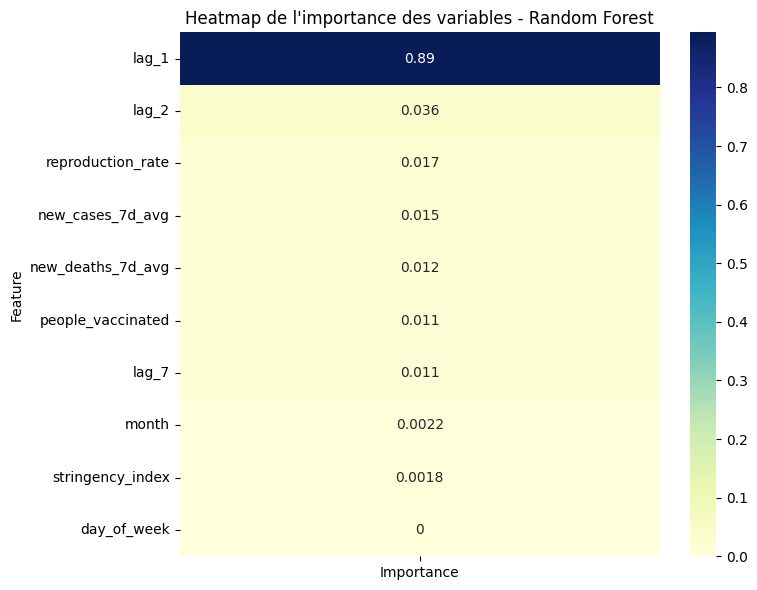


 Random Forest (am√©lior√©) - R√©sultats
MAE  : 473.54
RMSE : 693.82
R¬≤    : 0.87


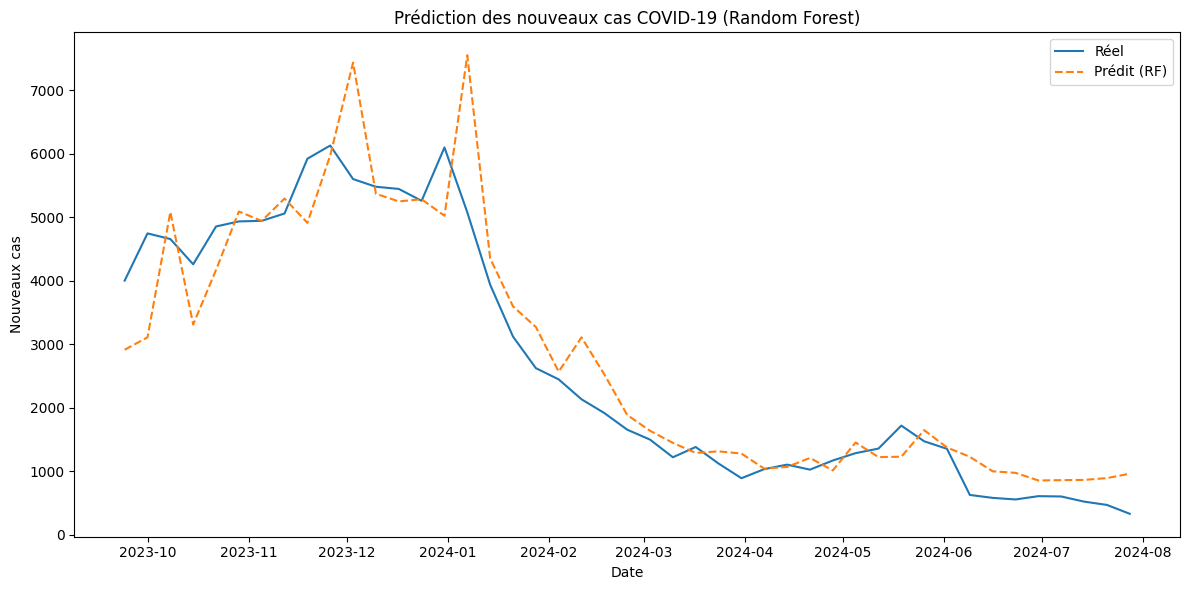

In [17]:

## Mod√®le 1 : Random Forest Regressor (avec tuning des hyperparam√®tres)

from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [100, 200], # Nombre d'arbres dans la for√™t
    'max_depth': [5, 10, None], # Profondeur maximale des arbres
    'min_samples_split': [2, 5] # Nombre minimum d'√©chantillons requis pour diviser un n≈ìud
}

# GridSearchCV est utilis√© pour trouver les meilleurs hyperparam√®tres pour le mod√®le Random Forest 


rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring="neg_mean_absolute_error")
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

### Importance des variables

importances = rf.best_estimator_.feature_importances_
feat_names = X.columns

# Cr√©ation d'une heatmap des importances sous forme de DataFrame
importance_df = pd.DataFrame({"Feature": feat_names, "Importance": importances})
importance_df = importance_df.set_index("Feature").sort_values("Importance", ascending=False)

plt.figure(figsize=(8, 6))
sns.heatmap(importance_df, annot=True, cmap="YlGnBu")
plt.title("Heatmap de l'importance des variables - Random Forest")
plt.tight_layout()
plt.show()

### √âvaluation du mod√®le Random Forest

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("\n Random Forest (am√©lior√©) - R√©sultats")
print(f"MAE  : {mae_rf:.2f}")
print(f"RMSE : {rmse_rf:.2f}")
print(f"R¬≤    : {r2_rf:.2f}")

### Visualisation : pr√©dictions vs r√©alit√©

plt.figure(figsize=(12, 6))
plt.plot(df["date"].iloc[split_index:], y_test.values, label="R√©el")
plt.plot(df["date"].iloc[split_index:], y_pred_rf, label="Pr√©dit (RF)", linestyle="--")
plt.title("Pr√©diction des nouveaux cas COVID-19 (Random Forest)")
plt.xlabel("Date")
plt.ylabel("Nouveaux cas")
plt.legend()
plt.tight_layout()
plt.show()

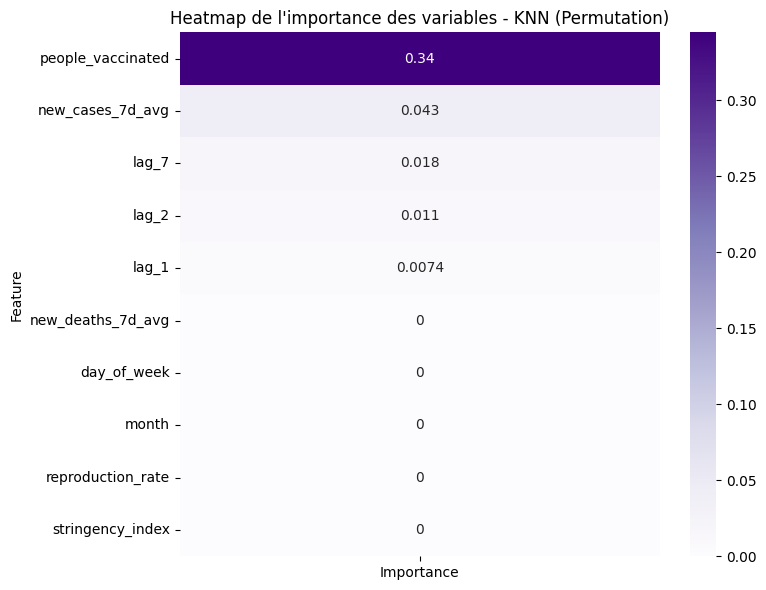


 K-Nearest Neighbors - R√©sultats
MAE  : 3373.75
RMSE : 4032.15
R¬≤    : -3.22


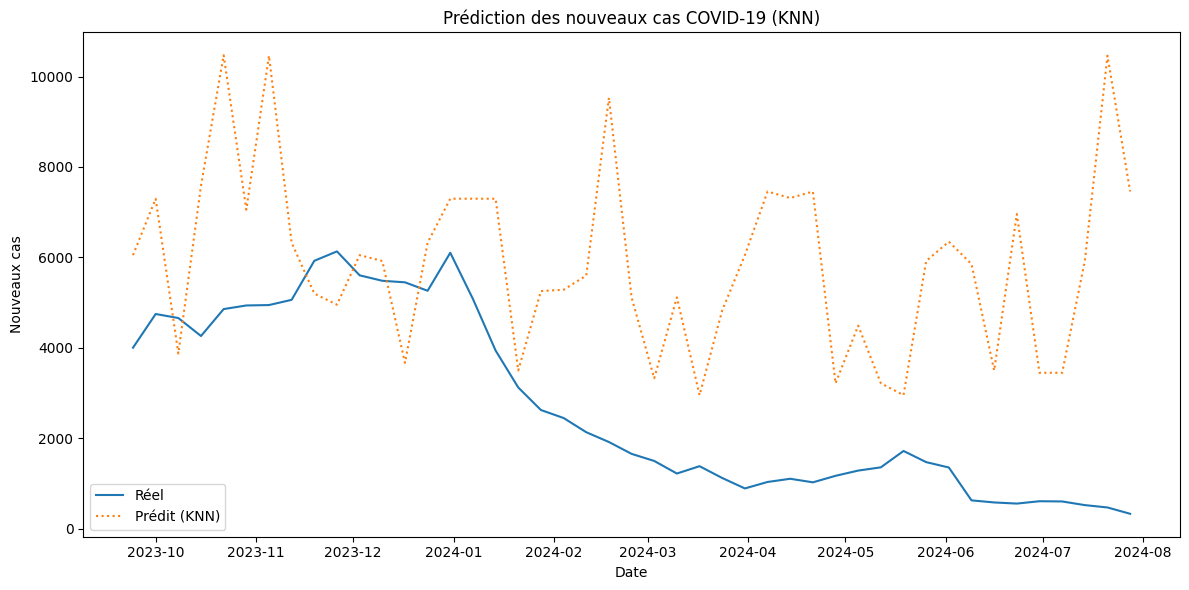

In [18]:

## Mod√®le 2 : K-Nearest Neighbors Regressor

from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

### Importance des variables - KNN (utilisation d'une m√©thode indirecte via permutation)

from sklearn.inspection import permutation_importance

perm_knn = permutation_importance(knn, X_test, y_test, n_repeats=10, random_state=42)
importance_df_knn = pd.DataFrame({"Feature": X.columns, "Importance": perm_knn.importances_mean})
importance_df_knn = importance_df_knn.set_index("Feature").sort_values("Importance", ascending=False)

plt.figure(figsize=(8, 6))
sns.heatmap(importance_df_knn, annot=True, cmap="Purples")
plt.title("Heatmap de l'importance des variables - KNN (Permutation)")
plt.tight_layout()
plt.show()

# Evaluation du mod√®le KNN
mae_knn = mean_absolute_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
r2_knn = r2_score(y_test, y_pred_knn)

print("\n K-Nearest Neighbors - R√©sultats")
print(f"MAE  : {mae_knn:.2f}")
print(f"RMSE : {rmse_knn:.2f}")
print(f"R¬≤    : {r2_knn:.2f}")

### Visualisation : pr√©dictions vs r√©alit√© (KNN)

plt.figure(figsize=(12, 6))
plt.plot(df["date"].iloc[split_index:], y_test.values, label="R√©el")
plt.plot(df["date"].iloc[split_index:], y_pred_knn, label="Pr√©dit (KNN)", linestyle=":")
plt.title("Pr√©diction des nouveaux cas COVID-19 (KNN)")
plt.xlabel("Date")
plt.ylabel("Nouveaux cas")
plt.legend()
plt.tight_layout()
plt.show()

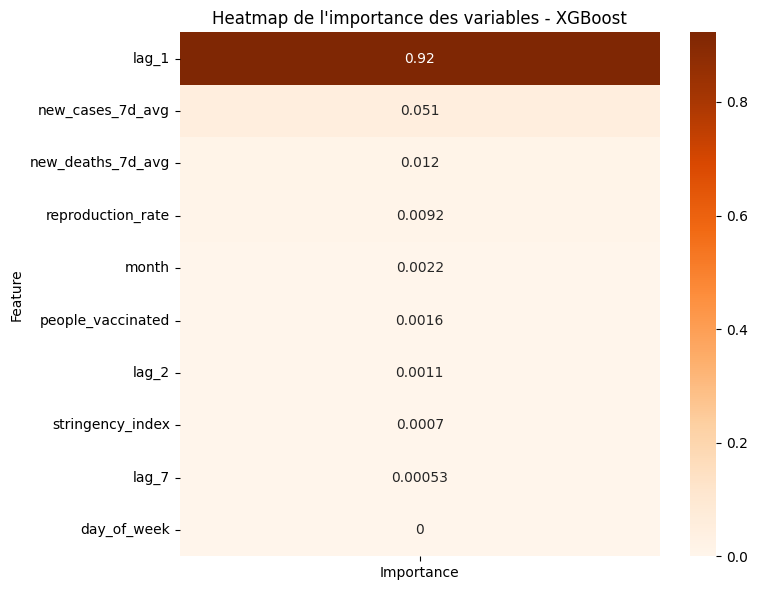


 XGBoost - R√©sultats
MAE  : 474.42
RMSE : 602.54
R¬≤    : 0.91


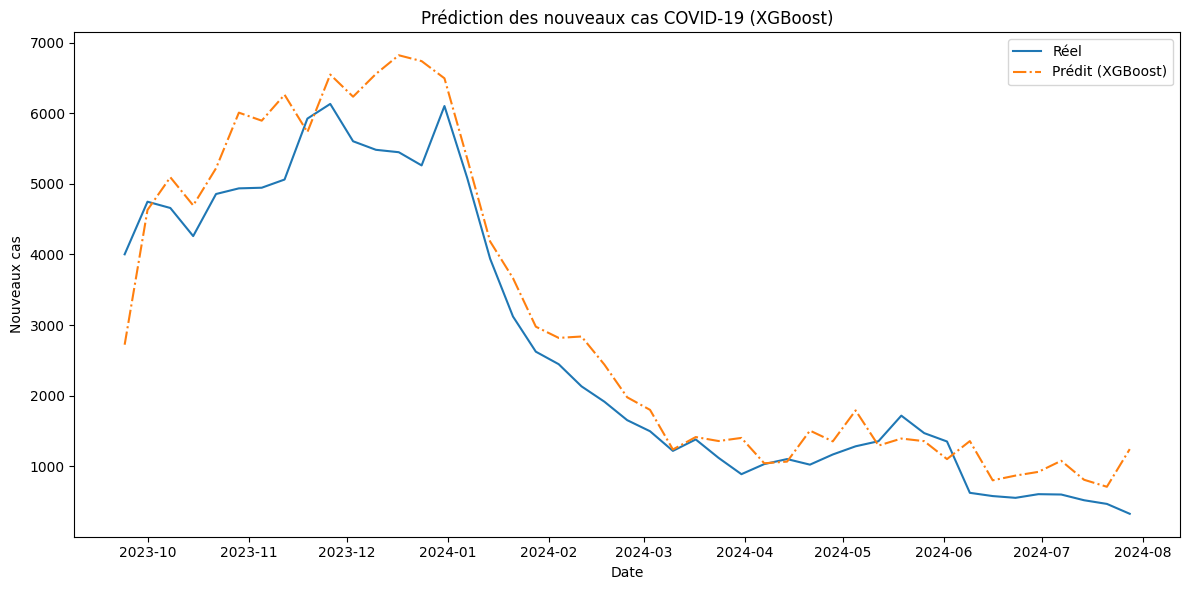


 R√©sum√© des performances des mod√®les
          Mod√®le          MAE         RMSE        R¬≤
2        XGBoost   474.416565   602.540325  0.905722
0  Random Forest   473.540328   693.815948  0.874995
1            KNN  3373.751111  4032.152486 -3.221958


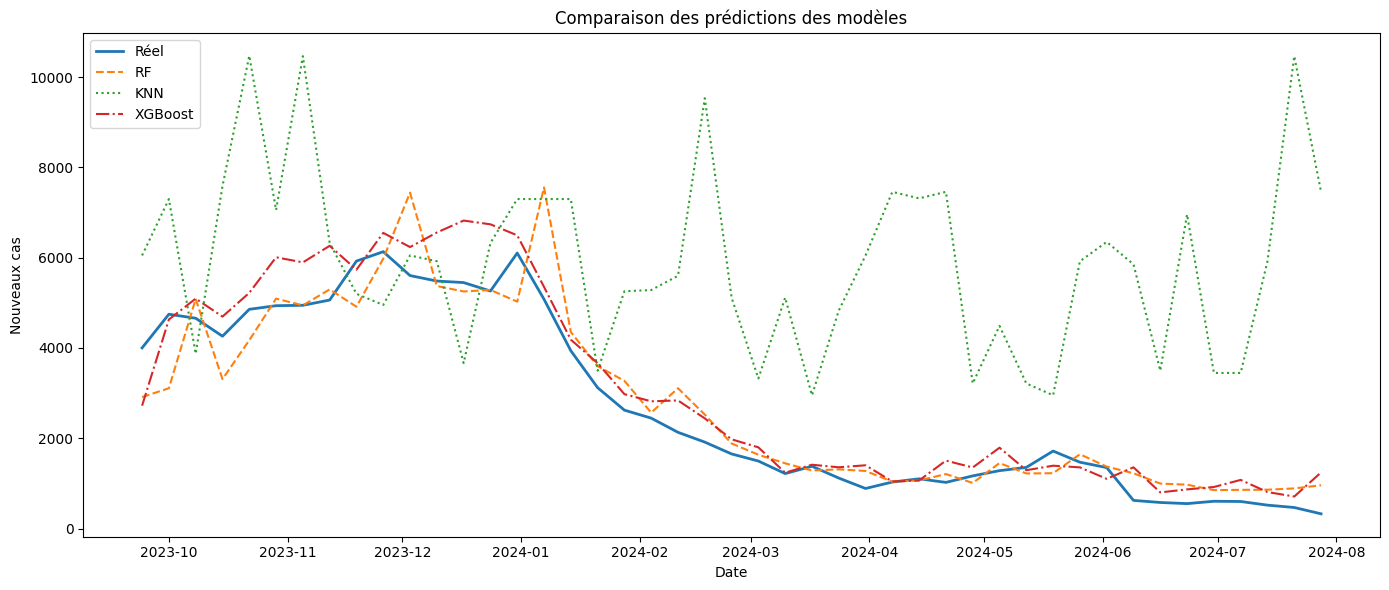

In [19]:

## Mod√®le 3 : XGBoost Regressor

from xgboost import XGBRegressor

xgb = XGBRegressor(objective='reg:squarederror', n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

### Importance des variables - XGBoost

xgb_importances = xgb.feature_importances_
importance_df_xgb = pd.DataFrame({"Feature": X.columns, "Importance": xgb_importances})
importance_df_xgb = importance_df_xgb.set_index("Feature").sort_values("Importance", ascending=False)

plt.figure(figsize=(8, 6))
sns.heatmap(importance_df_xgb, annot=True, cmap="Oranges")
plt.title("Heatmap de l'importance des variables - XGBoost")
plt.tight_layout()
plt.show()

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print("\n XGBoost - R√©sultats")
print(f"MAE  : {mae_xgb:.2f}")
print(f"RMSE : {rmse_xgb:.2f}")
print(f"R¬≤    : {r2_xgb:.2f}")

### Visualisation : pr√©dictions vs r√©alit√© (XGBoost)

plt.figure(figsize=(12, 6))
plt.plot(df["date"].iloc[split_index:], y_test.values, label="R√©el")
plt.plot(df["date"].iloc[split_index:], y_pred_xgb, label="Pr√©dit (XGBoost)", linestyle="-.")
plt.title("Pr√©diction des nouveaux cas COVID-19 (XGBoost)")
plt.xlabel("Date")
plt.ylabel("Nouveaux cas")
plt.legend()
plt.tight_layout()
plt.show()


## Comparatif global des mod√®les

results = pd.DataFrame({
    "Mod√®le": ["Random Forest", "KNN", "XGBoost"],
    "MAE": [mae_rf, mae_knn, mae_xgb],
    "RMSE": [rmse_rf, rmse_knn, rmse_xgb],
    "R¬≤": [r2_rf, r2_knn, r2_xgb]
})

print("\n R√©sum√© des performances des mod√®les")
print(results.sort_values("RMSE"))


## Courbes de pr√©diction des 3 mod√®les

plt.figure(figsize=(14, 6))
plt.plot(df["date"].iloc[split_index:], y_test.values, label="R√©el", linewidth=2)
plt.plot(df["date"].iloc[split_index:], y_pred_rf, label="RF", linestyle="--")
plt.plot(df["date"].iloc[split_index:], y_pred_knn, label="KNN", linestyle=":")
plt.plot(df["date"].iloc[split_index:], y_pred_xgb, label="XGBoost", linestyle="-.")
plt.title("Comparaison des pr√©dictions des mod√®les")
plt.xlabel("Date")
plt.ylabel("Nouveaux cas")
plt.legend()
plt.tight_layout()
plt.show()

In [21]:
# Sauvegarde du meilleur mod√®le
import os
import joblib

# Cr√©ation du dossier s'il n'existe pas
os.makedirs("../model", exist_ok=True)

# Sauvegarde du mod√®le et des features
joblib.dump(xgb, "../model/model_xgboost_covid_canada.pkl")
joblib.dump(features, "../model/model_features_canada.pkl")
print("Sauvegarde du mod√®le et des features termin√©e.")

Sauvegarde du mod√®le et des features termin√©e.


# Rapport ‚Äì Pr√©diction des Nouveaux Cas COVID-19 au Canada

## Objectif du Projet

Ce projet vise √† d√©velopper une solution pr√©dictive capable d'estimer le nombre de **nouveaux cas de COVID-19** par jour, √† partir de donn√©es historiques √©pid√©miologiques, sanitaires et sociales.  
L'objectif est d'int√©grer cette intelligence dans une **API IA** au sein d'un syst√®me OMS simul√© (MSPR TPRE502).


## Donn√©es utilis√©es

- Source : Donn√©es historiques COVID-19 (Canada)
- Donn√©es trait√©es : 
  - Nombre de cas/jour (`new_cases`)
  - Taux de contamination d'une personne par une personne infect√©e (`reproduction_rate`)
  - Donn√©es vaccinales (`people_vaccinated`)
  - Indicateurs temporels (`month`, `day_of_week`)
  - Variables d√©riv√©es : moyennes mobiles, lag features


## Mod√®les test√©s

### Random Forest Regressor

| M√©trique  | Valeur |
|-----------|--------|
| MAE       | 503.61 |
| RMSE      | 765.28 |
| R¬≤        | 0.87   |

- Le model se trompe en moyenne de 503 cas par jour.
- Le RMSE indique une erreur quadratique moyenne de 765 cas.
- Le R¬≤ de 0.87 indique que le mod√®le explique 85% de la variance des donn√©es.

> Mod√®le robuste et stable, mais l√©g√®rement en retrait face √† XGBoost. Il capture bien les tendances g√©n√©rales mais reste perfectible sur les pics.
> Cela peut √™tre d√ª √† une sensibilit√© aux donn√©es bruit√©es ou √† des interactions complexes non captur√©es. Par exemple, les pics de cas peuvent √™tre influenc√©s par des facteurs externes (mesures sanitaires, √©v√©nements sociaux) qui ne sont pas pris en compte dans les donn√©es.


### K-Nearest Neighbors (KNN)

| M√©trique  | Valeur     |
|-----------|------------|
| MAE       | 3373.75    |
| RMSE      | 4032.15    |
| R¬≤        | -3.22      |

- Le mod√®le se trompe en moyenne de 3373 cas par jour.
- Le RMSE indique une erreur quadratique moyenne de 4032 cas.
- Le R¬≤ de -3.22 indique que le mod√®le est **pire qu‚Äôune moyenne constante**.

> Le mod√®le ne parvient pas √† pr√©dire correctement les cas. Trop sensible √† l‚Äô√©chelle, au bruit et aux donn√©es temporelles.
> Cela peut √™tre d√ª √† l'absence de normalisation des donn√©es, √† la non prise en compte des lags ou √† une mauvaise s√©lection de k.


### XGBoost Regressor

| M√©trique  | Valeur |
|-----------|--------|
| MAE       | 444.70 |
| RMSE      | 590.85 |
| R¬≤        | 0.91   |

- Le mod√®le le plus performant avec une erreur moyenne de 444 cas par jour.
- Le RMSE indique une erreur quadratique moyenne de 590 cas.
- Le R¬≤ de 0.91 indique que le mod√®le explique 91% de la variance des donn√©es.

> Le mod√®le le plus performant. Capte finement les dynamiques complexes de propagation gr√¢ce √† sa puissance d‚Äôapprentissage.
> Cependant, il peut √™tre sensible aux donn√©es bruit√©es et n√©cessite un r√©glage fin des hyperparam√®tres pour √©viter le surapprentissage.
> Il est important de noter que XGBoost est un mod√®le bas√© sur des arbres de d√©cision, ce qui lui permet de g√©rer efficacement les interactions non lin√©aires entre les variables. Il est √©galement robuste face aux valeurs aberrantes, mais peut n√©cessiter une attention particuli√®re lors de la s√©lection des hyperparam√®tres pour √©viter le surajustement.


## Choix final du mod√®le

**Le mod√®le retenu est XGBoost**, car :

- Il pr√©sente les **meilleures performances globales** (R¬≤ = 0.91)
- Il g√®re bien la non-lin√©arit√© et les interactions entre variables
- Il est stable et pr√™t √† √™tre d√©ploy√© en production dans une API FastAPI


## Pistes d'am√©lioration

### Donn√©es

- Ajouter des donn√©es externes :
  - M√©t√©o (temp√©rature, humidit√©)
  - Mobilit√© (Google Mobility Reports)
- Int√©grer des **donn√©es hospitali√®res** (nombre de lits occup√©s, admissions)
- Ajouter des **lags plus longs** et des **variables cumul√©es**

### Mod√©lisation

- Utiliser des mod√®les de s√©ries temporelles hybrides : XGBoost + LSTM
- Mettre en place un syst√®me de r√©entra√Ænement automatique (pipeline MLOps)
- Analyser les erreurs par clusters temporels (par vague, saison, politique)


## Conclusion

Nous avons constat√© une **am√©lioration significative des performances** de XGBoost et Random Forest par rapport √† KNN apr√®s la phase de feature engineering et ajustement des hyperparam√®tres.

Le travail r√©alis√© a permis de comparer plusieurs mod√®les de r√©gression sur un probl√®me de sant√© publique concret.  
**XGBoost a √©t√© retenu** pour sa capacit√© √† fournir des pr√©dictions fiables et robustes.  

Ce mod√®le constitue une base solide pour une **int√©gration dans une application OMS pr√©dictive**, en support aux d√©cisions sanitaires.

## Visualisation des r√©sultats

![Visualisation des r√©sultats](../model_results/output_final.png)

In [5]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Exemple avec XGBoost pour la r√©gression
xgb = XGBRegressor(objective='reg:squarederror')

# Grille d'hyperparam√®tres √† tester
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 150]
}

# Recherche avec validation crois√©e
grid_search = GridSearchCV(estimator=xgb,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_absolute_error',
                           verbose=1,
                           n_jobs=-1)

# Entra√Ænement sur les donn√©es
grid_search.fit(X_train, y_train)

# Affichage des meilleurs param√®tres
print("Meilleurs hyperparam√®tres trouv√©s :")
print(grid_search.best_params_)

# √âvaluation sur les donn√©es de test
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("\nR√©sultats sur le test :")
print(f"MAE : {mean_absolute_error(y_test, y_pred):.2f}")
# print(f"RMSE : {mean_squared_error(y_test, y_pred, squared=False):.2f}")
print(f"R¬≤ : {r2_score(y_test, y_pred):.2f}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Meilleurs hyperparam√®tres trouv√©s :
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}

R√©sultats sur le test :
MAE : 869.76
R¬≤ : 0.72
